In [1]:
# Relevant libraries
from Ben_s_Analysis.FunkEquations import Funk_Equation_LowPPM, Funk_Equation_LowPPM2, Funk_Equation_HighPPM, Funk_Equation_FullPPM
import matplotlib.pyplot as plt
import pandas as pd

PPM 0.0 mean: 9.46, std: 1.75
PPM 2.0 mean: 10.59, std: 1.89
PPM 5.0 mean: 12.35, std: 2.26
PPM 10.0 mean: 15.32, std: 2.69
PPM 20.0 mean: 21.24, std: 3.39
PPM 35.0 mean: 29.32, std: 4.11
PPM 50.0 mean: 36.90, std: 4.48



/var/folders/1g/qs1wt1d52t1fp_9wj2_z6vlr0000gn/T/ipykernel_45652/2255848489.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Predicted PPM'] = y_pred


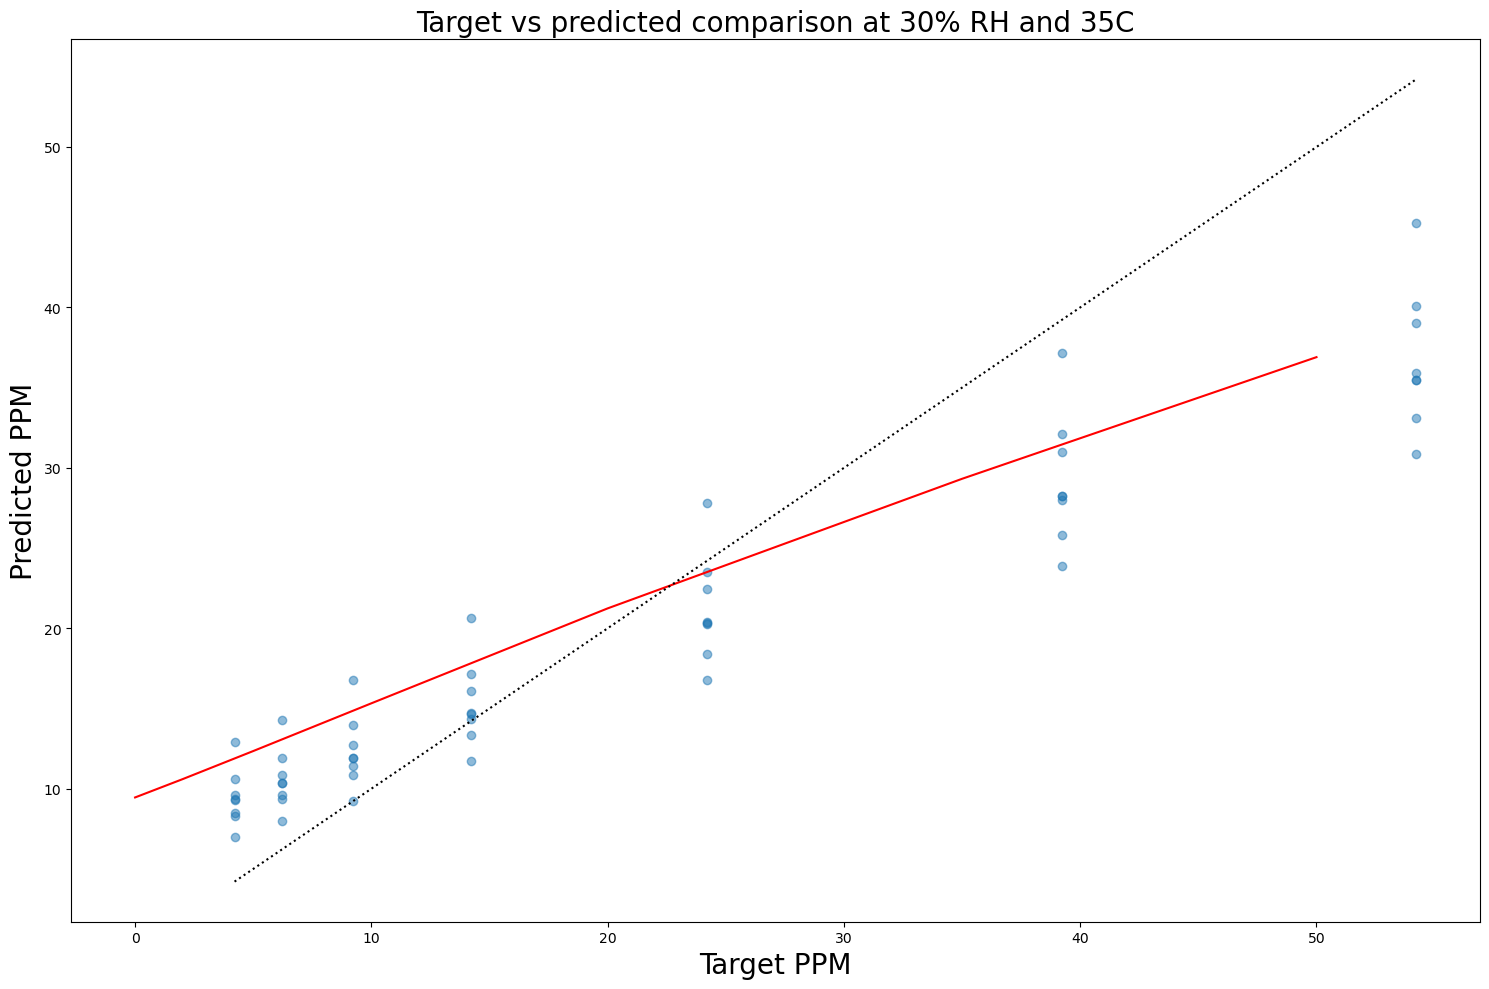

In [2]:
file2 = pd.read_csv("../../Output/LowPPMMatrix.csv")

# Humidity values
humidity_values = [30]  # Updated humidity values

# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(15, 10))  # Single subplot for one humidity value

for i, H in enumerate(humidity_values):
    # Filter data
    mask = (file2['RelativeHumidity'] >= H - 5) & (file2['RelativeHumidity'] <= H + 5) & (file2['Temperature'] <= 40) & (file2['Temperature'] >= 30)
    df_filtered = file2.loc[mask]

    xDataResistance1 = df_filtered['Resistance']
    xDataRH1 = df_filtered['RelativeHumidity']
    xDataTemp1 = df_filtered['Temperature']
    yDataTargetPPM1 = df_filtered['Target PPM'] + 4.21

    y_pred = Funk_Equation_LowPPM((xDataResistance1, xDataRH1, xDataTemp1))
    df_filtered['Predicted PPM'] = y_pred

    # Scatter plot
    axs.scatter(yDataTargetPPM1,y_pred, alpha=.5)

    # Mean prediction per target PPM
    mean_pred_per_target_ppm = df_filtered.groupby('Target PPM')['Predicted PPM'].mean()
    axs.plot( mean_pred_per_target_ppm.index ,mean_pred_per_target_ppm.values, color='r')

    # Linear dotted line
    axs.plot(yDataTargetPPM1,yDataTargetPPM1, 'k:')

    # Labels and titles
    axs.set_xlabel('Target PPM', fontsize=20)
    axs.set_ylabel('Predicted PPM', fontsize=20)
    axs.set_title('Target vs predicted comparison at 30% RH and 35C', fontsize=20)


    std_pred_per_target_ppm = df_filtered.groupby('Target PPM')['Predicted PPM'].std()

    # Create a string to print the mean and standard deviation for each group
    output_str = ""
    for target_ppm, (mean_val, std_val) in enumerate(zip(mean_pred_per_target_ppm, std_pred_per_target_ppm)):
        output_str += f"PPM {mean_pred_per_target_ppm.index[target_ppm]} mean: {mean_val:.2f}, std: {std_val:.2f}\n"

    print(output_str)


# Show plot
plt.tight_layout()
plt.show()

PPM 0.0 mean: -0.45, std: 0.93
PPM 2.0 mean: 1.09, std: 1.05
PPM 5.0 mean: 3.54, std: 1.22
PPM 10.0 mean: 7.54, std: 1.61
PPM 20.0 mean: 15.31, std: 2.18
PPM 35.0 mean: 26.13, std: 2.91
PPM 50.0 mean: 36.36, std: 3.57



/var/folders/1g/qs1wt1d52t1fp_9wj2_z6vlr0000gn/T/ipykernel_62887/531099176.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Predicted PPM'] = y_pred


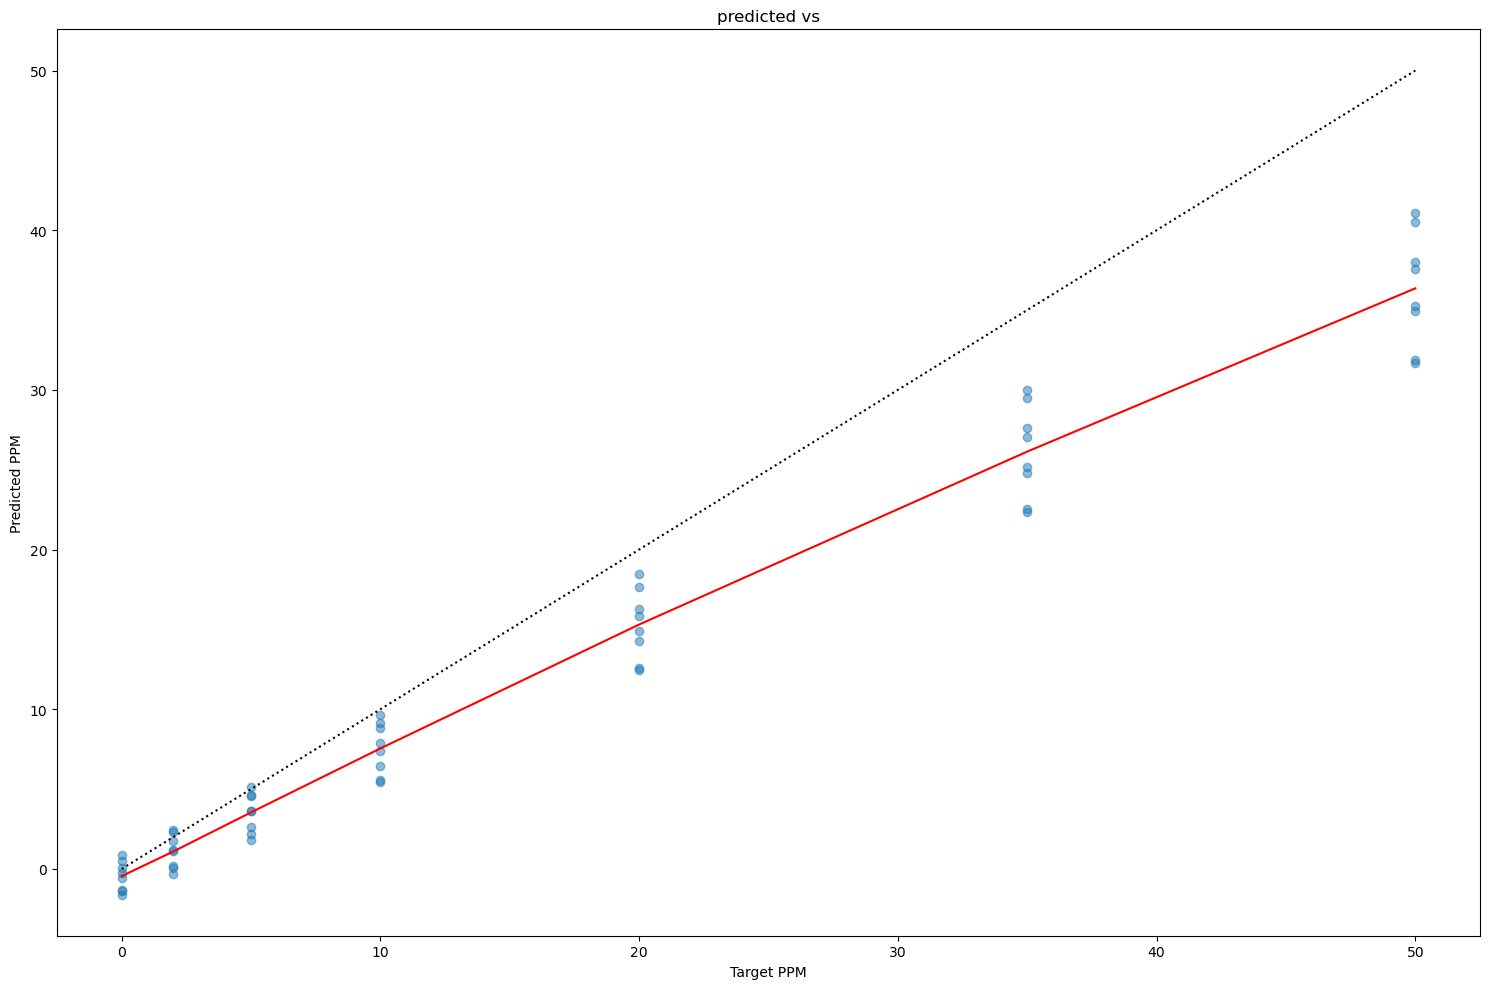

In [13]:
# Humidity values
humidity_values = [30]  # Updated humidity values

# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(15, 10))  # Single subplot for one humidity value

for i, H in enumerate(humidity_values):
    # Filter data
    mask = (file2['RelativeHumidity'] >= H - 5) & (file2['RelativeHumidity'] <= H + 5) & (file2['Temperature'] <= 25) & (file2['Temperature'] >= 15)
    df_filtered = file2.loc[mask]

    xDataResistance1 = df_filtered['Resistance']
    xDataRH1 = df_filtered['RelativeHumidity']
    xDataTemp1 = df_filtered['Temperature']
    yDataTargetPPM1 = df_filtered['Target PPM']

    y_pred = Funk_Equation_LowPPM2((xDataResistance1, xDataRH1, xDataTemp1))
    df_filtered['Predicted PPM'] = y_pred

    # Scatter plot
    axs.scatter(yDataTargetPPM1,y_pred, alpha=.5)

    # Mean prediction per target PPM
    mean_pred_per_target_ppm = df_filtered.groupby('Target PPM')['Predicted PPM'].mean()
    axs.plot( mean_pred_per_target_ppm.index,mean_pred_per_target_ppm.values, color='r')

    # Linear dotted line
    axs.plot(yDataTargetPPM1,yDataTargetPPM1, 'k:')

    # Labels and titles
    axs.set_xlabel('Target PPM')
    axs.set_ylabel('Predicted PPM')
    axs.set_title('predicted vs')


    std_pred_per_target_ppm = df_filtered.groupby('Target PPM')['Predicted PPM'].std()

    # Create a string to print the mean and standard deviation for each group
    output_str = ""
    for target_ppm, (mean_val, std_val) in enumerate(zip(mean_pred_per_target_ppm, std_pred_per_target_ppm)):
        output_str += f"PPM {mean_pred_per_target_ppm.index[target_ppm]} mean: {mean_val:.2f}, std: {std_val:.2f}\n"

    print(output_str)


# Show plot
plt.tight_layout()
plt.show()